# Plot the data for a specific subid

Read from the results file and plot a specifc file in the required format.

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import numpy as np

Declare constants

In [12]:
from modules.config import RESULTS_DIR, RESULTS_FILE
#RUNID = '20250413-21-03-35'
#SUBID = '09-21-45'
RUNID = '20250421-21-16-42'
SUBID = '04-18-27'

Load relevant data from results file:

In [13]:
results_file = Path(RESULTS_DIR).joinpath(RESULTS_FILE)
df_summary = pd.read_csv(results_file)
df_summary = df_summary[df_summary['runid'] == RUNID]
df_summary = df_summary[df_summary['subid'] == SUBID]
df_summary.head()
best = df_summary['best_dist'].astype(float)

Load detailed data:

In [14]:
filename  = f'{SUBID}.csv'
df_detailed = pd.read_csv(Path(RESULTS_DIR).joinpath(RUNID,filename))
df_detailed.drop('index_list', axis=1, inplace=True)
df_detailed['best_dist'] = best.values[0]
df_detailed.head()

,average_list,lowest_list,sliced_list,best_dist
0,627.643555,432.7,606.139844,297.2
1,617.865527,398.4,602.882788,297.2
2,621.067090,397.5,593.642310,297.2
3,615.719141,397.5,591.592456,297.2
4,609.220801,397.5,589.430298,297.2


Plot graph

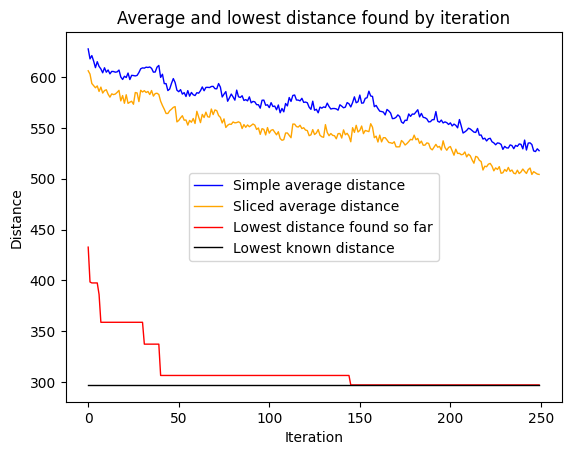

: 

In [ ]:
plt.plot(df_detailed.index, df_detailed['average_list'], linewidth=1.0, color = 'blue', label='Simple average distance')
plt.plot(df_detailed.index, df_detailed['sliced_list'], linewidth=1.0, color = 'orange', label='Sliced average distance')
plt.plot(df_detailed.index, df_detailed['lowest_list'], linewidth=1.0, color = 'red', label='Lowest distance found so far')
plt.plot(df_detailed.index, df_detailed['best_dist'], linewidth=1.0, color = 'black', label='Lowest known distance')
plt.title('Average and lowest distance found by iteration')
plt.xlabel('Iteration')
plt.ylabel('Distance')
plt.legend()
